In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from cnn_dueling import DuelingCNN

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

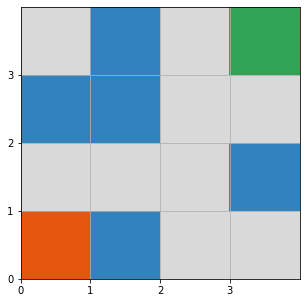

In [3]:
env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=100,
    img_state=True,
    greyscale=True,
    img_size=(64, 64),
)

In [4]:
target_net = DuelingCNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

policy_net = DuelingCNN(
    img_dim=1 if env.greyscale else 3,
    w=env.img_size[0],
    h=env.img_size[1],
    input_dim=np.prod(env.img_size),
    output_dim=env.n_actions,
)

dqn = DQN(
    env=env,
    log_freq=20,
    train_freq=3,
    batch_size=10,
    w_sync_freq=10,
    memory_size=100,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=300,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=True,
    model_path='../models/dqn_with_dueling',
)

In [5]:
dqn.run()

Episode: 0, Reward: -380.95000000000044, Loss: 0
Episode: 20, Reward: -150.89999999999992, Loss: 125.25547790527344
Episode: 40, Reward: 2.1, Loss: 6.694447040557861
Episode: 60, Reward: 3.05, Loss: 4.5436882972717285
Episode: 80, Reward: -11.900000000000002, Loss: 1.3816014528274536
Episode: 100, Reward: 2.1, Loss: 1.8608039617538452
Episode: 120, Reward: 2.150000000000001, Loss: 2.803635835647583
Episode: 140, Reward: 4.75, Loss: 3.458531379699707
Episode: 160, Reward: -17.900000000000013, Loss: 7.523781776428223
Episode: 180, Reward: -11.950000000000003, Loss: 2.8183116912841797
Episode: 200, Reward: -23.85, Loss: 7.242311954498291
Episode: 220, Reward: 3.8499999999999996, Loss: 0.6474896669387817
Episode: 240, Reward: 4.75, Loss: 0.7172254920005798
Episode: 260, Reward: -27.049999999999997, Loss: 1.364739179611206
Episode: 280, Reward: 4.75, Loss: 0.5355516672134399


In [6]:
dqn.evaluate()

In [7]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn_dueling.mp4')
Video('dqn_dueling.mp4')

#### Training

Text(0.5, 1.0, 'Epsilon decay per episode')

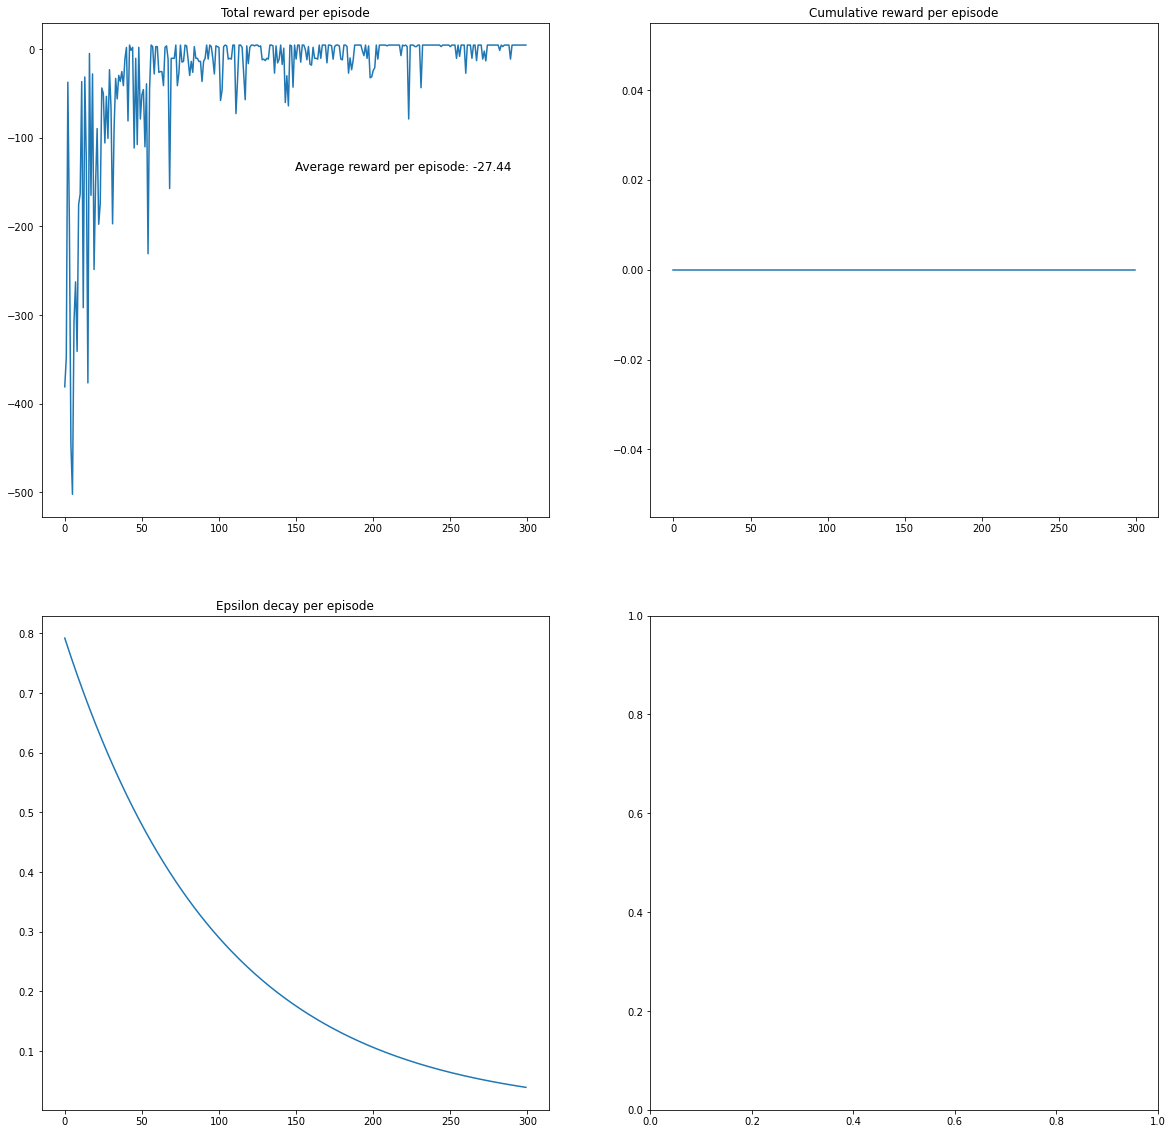

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

Text(0.5, 1.0, 'Cumulative reward per episode')

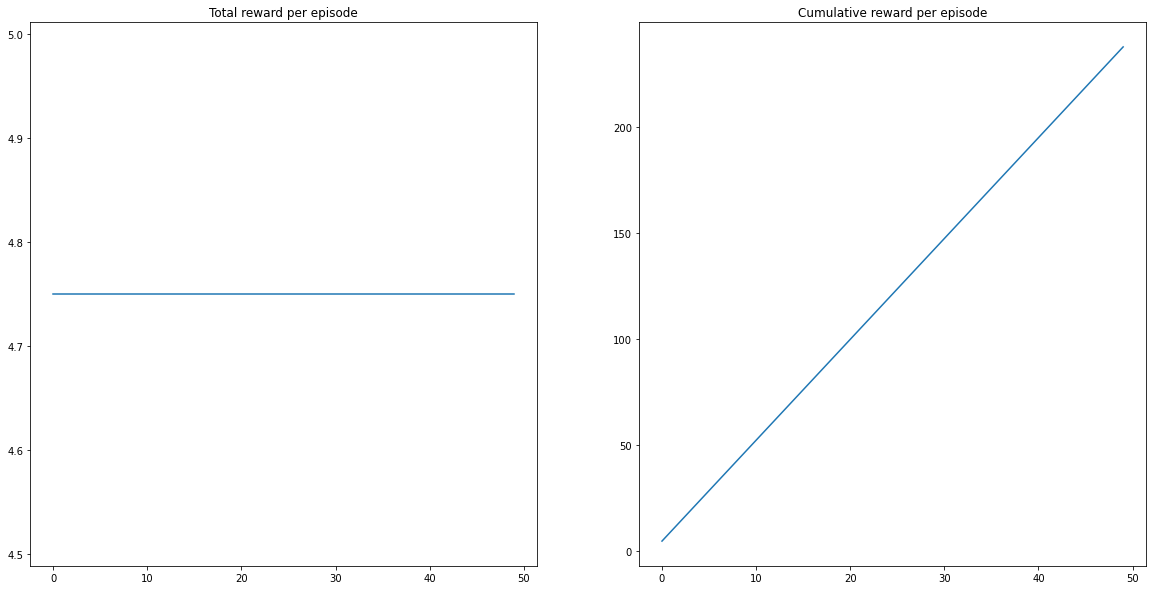

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')